# Predictive Analytics for Diabetes Management

**Project Overview**

Welcome to our predictive analytics project, an innovative endeavor aimed at revolutionizing diabetes management through advanced data science and machine learning. In this project, we harness the power of predictive models to identify individuals at high risk of developing diabetes, enabling earlier interventions and personalized healthcare strategies.

**The Challenge**

Diabetes is a global health issue affecting millions of people worldwide. Early detection and preventive care can significantly improve the quality of life and reduce the healthcare burden. However, traditional methods of diabetes prediction rely heavily on periodic medical testing, which may not capture risk factors early enough. Our project addresses this gap by utilizing readily available health data to predict diabetes risk more efficiently and effectively.

**Our Approach**

Leveraging the Pima Indians Diabetes Database, our project employs a systematic approach to data analysis:
1. **Data Collection**: We gather comprehensive health metrics such as glucose levels, blood pressure, and BMI, which are critical in assessing diabetes risk.
2. **Exploratory Data Analysis (EDA)**: Through detailed statistical analysis and visualizations, we explore data patterns and relationships that inform our predictive modeling.
3. **Data Preprocessing**: We implement rigorous data cleaning and normalization techniques to prepare the dataset for optimal model performance.
4. **Predictive Modeling**: Using logistic regression, a robust statistical method, we develop a model capable of predicting diabetes onset with high accuracy.
5. **Deployment**: The predictive model is deployed using AWS SageMaker, providing a scalable and accessible platform for healthcare providers to utilize in real-time risk assessment.

**Impact and Vision**

Our project not only aims to enhance diabetes screening and prevention but also serves as a blueprint for applying predictive analytics in other areas of healthcare. By integrating data-driven insights into clinical practices, we envision a future where healthcare is more proactive, personalized, and preventive.

**Join Us on This Journey**

We invite you to join us in this transformative journey as we explore the frontiers of healthcare innovation. Together, we can make a significant impact on diabetes management and beyond, paving the way for a healthier future.



Creating a predictive analytics project involves several key steps, from data collection to model deployment. Let's design a predictive analytics project for healthcare, specifically predicting diabetes among patients based on various health metrics. This project will use Python for data handling, analysis, and model building. For demonstration purposes, we'll use local machine resources, but I'll also outline how you could leverage AWS SageMaker for deployment.

### Step 1: Setting Up the Environment

First, ensure you have Python and necessary libraries installed:

In [ ]:
#run it on local (just remove the " ")
"""
pip install numpy pandas matplotlib scikit-learn
"""

'\npip install numpy pandas matplotlib scikit-learn\n'

### Step 2: Data Collection

We'll use the Pima Indians Diabetes Database, which is readily available and widely used for diabetes prediction tasks. It includes data such as glucose levels, blood pressure, and other health measures.

In [ ]:
# Step 2: Data Collection

import pandas as pd

# Load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 3: Exploratory Data Analysis (EDA)

EDA helps understand the data, identify patterns, and potential issues.

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

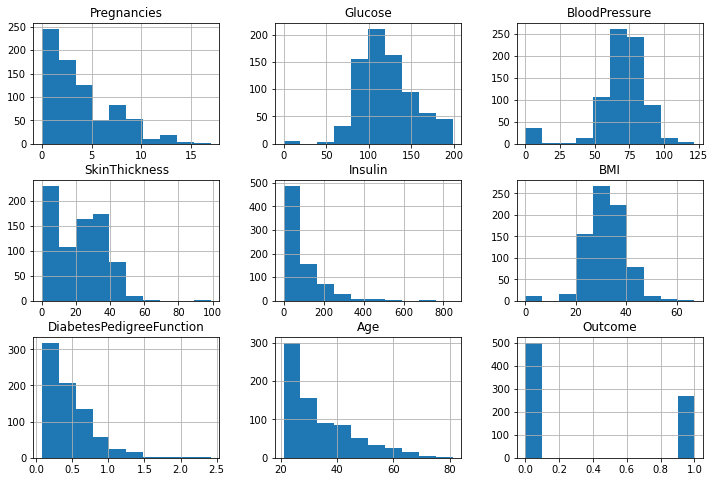

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Basic statistics
print(data.describe())

# Histograms for distribution
data.hist(figsize=(12, 8))
plt.show()

# Check for null values
print(data.isnull().sum())

The exploratory data analysis (EDA) of the Pima Indians Diabetes Database provides key insights into the distribution and characteristics of various health metrics that are related to diabetes. Let’s analyze the statistical summary of the dataset:

#### Key Statistical Measures

1. **Count**: Each column has 768 data points, indicating no missing values in the dataset columns used for summary statistics.

2. **Mean**: The average values for each feature give us an idea of the central tendency. For example, the average glucose level is about 121, which is crucial for identifying diabetes risk.

3. **Standard Deviation (std)**: This indicates the amount of variation or dispersion in the data. For instance, glucose levels have a standard deviation of approximately 32, suggesting a wide range of values around the mean, which is typical given individual health differences.

4. **Min and Max Values**: The range (from minimum to maximum) provides insights into the spread of the data. The wide range in insulin levels (0 to 846) could indicate diverse patient profiles, from non-diabetic to those requiring significant insulin management.

5. **25%, 50% (Median), and 75% Percentiles**:
   - These values (also known as quartiles) provide a deeper understanding of the distribution. For glucose, 25% of the people have a level below 99, half below 117, and 75% below 140.25, indicating a skewed distribution toward higher glucose levels.

#### Observations and Interpretations

- **Zeros in Data**: The presence of 0 in features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI, where biologically they should not be zero, suggests missing or improperly recorded data. These need to be treated either by imputation or exclusion, depending on their impact on the analysis.

- **Pregnancies**: The data ranges from 0 to 17 pregnancies. A higher number of pregnancies can be a risk factor for diabetes, making this an important feature for prediction.

- **Age**: The participants range from 21 to 81 years old, with a mean age of around 33 years. Age is a crucial factor as the risk of diabetes increases with age.

- **Outcome( 0 or 1 : presence or not of diabetes**: The mean of 0.35 approximates the proportion of positive diabetes cases in the dataset (approximately 35%), indicating a significant number of cases for analysis.

#### Deeper Insights

- **Insulin and Diabetes**: The high standard deviation in insulin levels suggests significant variability, which is expected given the diverse treatment needs among diabetics.

- **BMI and Diabetes Risk**: BMI is a key indicator of diabetes risk. The average BMI is close to 32 (obese category), aligning with higher diabetes risk.

- **Diabetes Pedigree Function**: This feature, representing genetic influence, varies significantly, indicating varied genetic predispositions among individuals.

#### Conclusion and Further Analysis

This EDA provides a solid foundation for predictive modeling. Understanding these distributions and relationships will help in feature engineering (e.g., handling zeros, creating age categories, interactions between features like BMI and glucose levels). The next steps would include more granular analyses like checking for outliers, correlation analysis, and potential multicollinearity among features before moving on to model building.


#### Deeper Analysis

we are now doing futher analysis of the dataset, including checking for outliers, performing correlation analysis, and assessing potential multicollinearity among features.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Checking for Outliers
Outliers can significantly impact the performance of a machine learning model, especially linear models. We'll use boxplots to visually inspect for outliers.

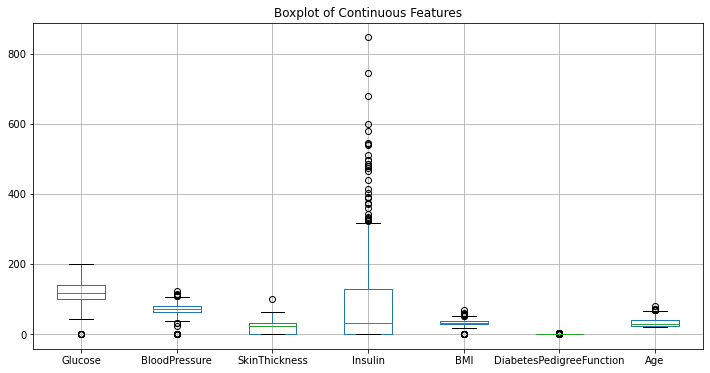

In [ ]:
# Plotting boxplots for continuous features
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(12, 6))
data[features].boxplot()
plt.title('Boxplot of Continuous Features')
plt.show()


##### Correlation Analysis

Correlation analysis helps us understand the relationships between different features. This is crucial for identifying features that might provide similar information.

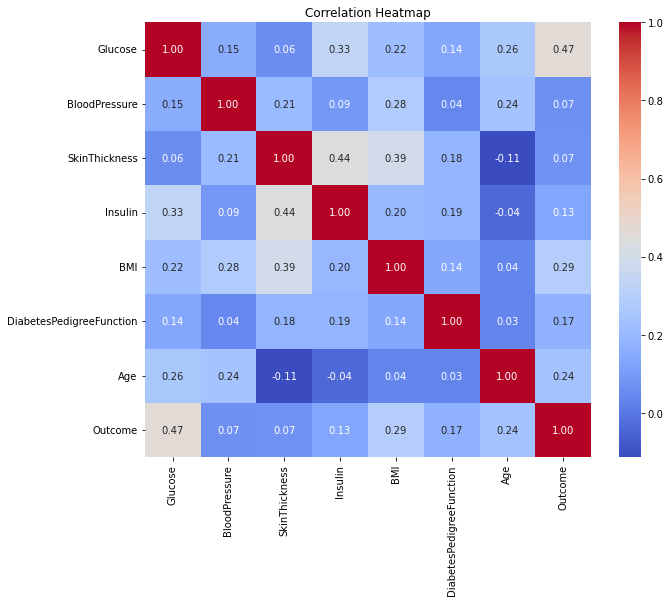

In [ ]:
# Calculating correlation matrix
corr_matrix = data[features + ['Outcome']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Based on the correlation heatmap you've provided, we can analyze and interpret the relationships between different health metrics in the dataset and their correlation with the diabetes outcome. Here's a detailed interpretation:

###### Understanding the Heatmap

The heatmap shows the Pearson correlation coefficients between various features. The coefficients range from -1 to 1, where:
- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no correlation.

###### Interpretations of Key Correlations

1. **Glucose and Outcome (0.47)**:
   - This is one of the highest positive correlations observed with the outcome. Higher glucose levels are strongly associated with the presence of diabetes, which is consistent with medical knowledge that glucose levels are a critical factor in diabetes diagnosis.

2. **BMI and Outcome (0.29)**:
   - There's a moderate positive correlation between BMI and diabetes. Higher BMI values, which indicate overweight or obesity, can increase the risk of developing diabetes.

3. **Age and Outcome (0.24)**:
   - Age shows a moderate positive correlation with diabetes. The risk of developing diabetes increases with age, which aligns with the understanding that aging populations have a higher propensity for type 2 diabetes.

4. **Insulin and SkinThickness (0.44)**:
   - There is a moderate positive correlation between insulin levels and skin thickness. This can be attributed to the fact that both these parameters change with alterations in body metabolism and fat distribution, which are influenced by insulin resistance—a key factor in diabetes.

5. **Blood Pressure and BMI (0.28)**:
   - A moderate positive correlation exists here, suggesting that as BMI increases, blood pressure tends to be higher. Both high blood pressure and high BMI are risk factors for many cardiovascular diseases and diabetes.

6. **SkinThickness and BMI (0.39)**:
   - This moderate correlation indicates that higher BMI is often associated with greater skin thickness, which might be due to increased fat deposits under the skin.

###### Low or No Significant Correlations

- **DiabetesPedigreeFunction and most variables** show very low correlations, suggesting that while this genetic factor is important, it does not have a strong linear relationship with other individual health metrics in the dataset.

###### Conclusions and Actions

- **Strong Predictors**: Glucose, BMI, and Age are strong predictors for diabetes and should be considered key features in predictive modeling.
- **Multicollinearity Concern**: Moderate correlations between predictors like Insulin and SkinThickness, and Blood Pressure and BMI, indicate potential multicollinearity. While they are not excessively high (e.g., above 0.8), care should be taken when using these features together in a model.
- **Feature Engineering and Selection**: The insights from this correlation analysis can guide feature selection and engineering. For instance, creating interaction terms or composite indices from correlated features might capture combined effects on diabetes risk more effectively.


##### Assessing Multicollinearity

Multicollinearity occurs when two or more predictors in a regression model are highly correlated. This can make the model unstable by increasing the variance of the coefficient estimates and making the model harder to interpret.

    Variance Inflation Factor (VIF) is a common method to check for multicollinearity. A VIF value greater than 10 is typically considered indicative of multicollinearity.

In [ ]:
def calculate_vif(data, features):
    X = data[features].copy()
    X['Intercept'] = 1  # Adding an intercept column for VIF calculation safely
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.drop(columns=['Intercept'])  # Ensuring correct column drop


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, features):
    # Create a copy of the data with only the features of interest
    X = data[features].copy()

    # Adding an intercept column for VIF calculation
    X['Intercept'] = 1

    # Prepare DataFrame to store VIF values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns

    # Calculate VIF for each feature including the Intercept
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Drop the 'Intercept' column from the VIF DataFrame before returning
    vif = vif[vif['Variable'] != 'Intercept']
    return vif

# Example usage
# Define features list if not already defined
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
vif_data = calculate_vif(data, features)
print(vif_data)



                   Variable       VIF
0               Pregnancies  1.430872
1                   Glucose  1.298961
2             BloodPressure  1.181863
3             SkinThickness  1.507432
4                   Insulin  1.427536
5                       BMI  1.297450
6  DiabetesPedigreeFunction  1.067090
7                       Age  1.588368


The Variance Inflation Factor (VIF) is a measure that quantifies how much the variance of an estimated regression coefficient increases if your predictors are correlated. If no factors are correlated, the VIFs will be 1.

Here's what the VIF values from your results indicate:

###### Interpretation of VIF Results:

- **VIF = 1**: Not correlated.
- **1 < VIF < 5**: Moderately correlated.
- **VIF >= 5**: Highly correlated (some sources use a higher threshold of 10).

According to your results:

1. **Pregnancies (VIF = 1.430872)**: This suggests a low level of multicollinearity. Pregnancies have a slight correlation with other variables but nothing too significant.

2. **Glucose (VIF = 1.298961)**: Very low multicollinearity. This indicates that glucose is mostly independent of other variables, which is excellent for a model since glucose is a crucial factor in diabetes prediction.

3. **Blood Pressure (VIF = 1.181863)**: Similar to glucose, blood pressure shows very low multicollinearity, suggesting it acts independently in the context of these variables.

4. **Skin Thickness (VIF = 1.507432)**: Again, this shows low multicollinearity. It’s slightly higher than some other variables, suggesting a mild correlation with others, possibly with BMI or insulin.

5. **Insulin (VIF = 1.427536)**: Low multicollinearity, indicating that while insulin levels might show some relation to other measurements like skin thickness or BMI, it is largely independent.

6. **BMI (VIF = 1.297450)**: Very low multicollinearity. BMI is an important independent predictor which does not overlap significantly with others in terms of explaining the variability in the outcome.

7. **Diabetes Pedigree Function (VIF = 1.067090)**: This has the lowest VIF, indicating it is the most independent of all the features studied. This supports the use of the diabetes pedigree function as a unique contributor to the model.

8. **Age (VIF = 1.588368)**: Shows low multicollinearity. It is slightly more correlated with other features than some of the other variables but is still well below the threshold of concern.

###### Overall Interpretation:

All VIF values are well below 5, indicating there are no concerning multicollinearity issues among the features you're considering for your predictive model. This is beneficial because it suggests that each variable provides unique information that can help in predicting diabetes, without overly inflating the variance of the estimates due to multicollinearity. This enhances the stability and reliability of your model.

the model is on solid ground with respect to the independence of features, and we can proceed with building our predictive model without concerns about multicollinearity affecting the interpretations of these predictors.

# Step 4: Data Preprocessing

We need to handle missing values, scale data, and split it into training and testing datasets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace zeros with NaN, then fill NaN with the mean of the column
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_replace] = data[columns_to_replace].replace(0, pd.NA)
data.fillna(data.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
data[columns_to_replace] = scaler.fit_transform(data[columns_to_replace])

# Split data
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\josep\AppData\Local\Temp/ipykernel_25924/229179923.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.mean(), inplace=True)


# Step 5: Model Building



Choosing the appropriate model for a predictive analytics task, like predicting diabetes from medical data, involves evaluating several factors, including the nature of the target variable, the distribution and characteristics of the features, computational efficiency, and the interpretability of the model. Here’s why logistic regression is a fitting choice for this scenario based on the results and analysis conducted:

### Reasons for Choosing Logistic Regression

1. **Binary Outcome**: The primary outcome variable, 'Outcome', is binary (0 or 1, representing the absence or presence of diabetes). Logistic regression is specifically designed for binary classification tasks, making it naturally suited for this problem.

2. **Interpretability**: Logistic regression provides great interpretability. Each feature's coefficient can be directly associated with its odds ratio, offering clear insights into how each predictor affects the likelihood of having diabetes. This is particularly important in healthcare, where understanding the influence of predictors is as crucial as the prediction itself.

3. **Low Multicollinearity**: The Variance Inflation Factor (VIF) analysis shows low multicollinearity among predictors, which is ideal for logistic regression. High multicollinearity can distort the estimated relationship between features and the outcome, leading to unreliable and unstable estimates of regression coefficients.

4. **Performance with Smaller Datasets**: The dataset, while not tiny, is not large by modern machine learning standards (768 observations). Logistic regression is effective for moderate-sized datasets and does not require as large a sample size as more complex models like deep learning to achieve stable estimates.

5. **Baseline Model**: Logistic regression is often used as a baseline in binary classification problems. Its performance provides a benchmark to compare against more complex algorithms, ensuring that any increase in complexity is justified by a significant improvement in performance.

### Why Not Other Models?

While logistic regression is a robust choice, other models could potentially be used, depending on the project's needs. Here’s why they might not be the first choice:

1. **Decision Trees and Random Forests**: These can handle nonlinear relationships and interactions between features better than logistic regression. However, they can be prone to overfitting, especially with smaller datasets. They are also less interpretable in comparison to logistic regression, which can be a drawback in clinical settings.

2. **SVM (Support Vector Machines)**: SVMs are powerful for binary classification problems and can handle both linear and nonlinear boundaries. However, they require more computational resources and are less interpretable due to their reliance on kernel transformations.

3. **Neural Networks**: These are highly flexible and can model complex relationships. However, they require large amounts of data, significant computational power, and can lead to models that are very difficult to interpret. They also risk overfitting with smaller datasets.

4. **Naive Bayes**: This model assumes independence between predictors, an assumption that is rarely true in real-world scenarios and can lead to biased results, despite its simplicity and efficiency in certain types of classification problems.

### Conclusion

In summary, logistic regression's suitability for binary outcomes, its interpretability, effectiveness with the available data size, and relatively low assumptions about the data distribution make it an excellent starting point for this diabetes prediction model. As the project progresses, comparing its performance with alternative models might provide insights and potentially better performance but at the cost of complexity and interpretability.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Model initialization and training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]


Let's dive deep into the results of your logistic regression model, focusing on its accuracy and the details provided by the confusion matrix. We'll also consider the practical consequences of these results in the context of predicting diabetes.

##### Results Overview

- **Accuracy**: 75.32%
- **Confusion Matrix**:
  ```
  [[82, 17]
   [21, 34]]
  ```

##### Breaking Down the Confusion Matrix

The confusion matrix is a powerful tool for understanding the performance of a classification model beyond mere accuracy. It provides the numbers of true positives, true negatives, false positives, and false negatives. Here’s what each term means in your case:

- **True Negatives (TN = 82)**: The model correctly predicted 'no diabetes' for 82 cases.
- **False Positives (FP = 17)**: The model incorrectly predicted 'diabetes' when the patient did not have it.
- **False Negatives (FN = 21)**: The model incorrectly predicted 'no diabetes' when the patient actually had diabetes.
- **True Positives (TP = 34)**: The model correctly predicted 'diabetes' for 34 cases.

##### Graphical Interpretation

To visually analyze these results, we can use a couple of charts:

1. **Confusion Matrix Heatmap**:
   - This will help us visualize the actual vs. predicted classifications.


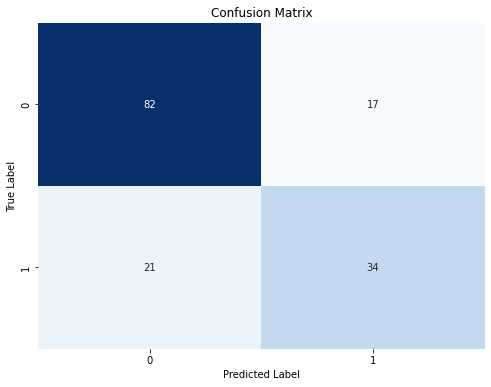

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

2. **ROC Curve**:
   - This shows the trade-off between sensitivity (true positive rate) and specificity (false positive rate) across various thresholds. It's useful for seeing how well the model discriminates between the two classes.

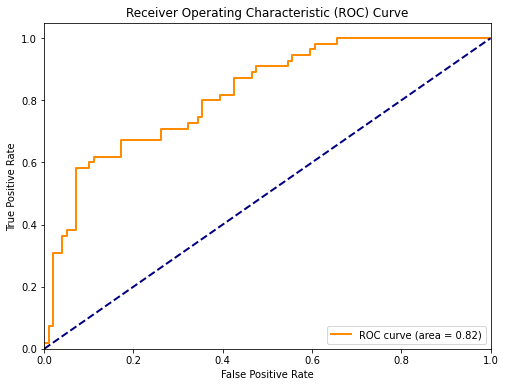

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Consequences and Clinical Implications

    Accuracy (75.32%): While this indicates that the model is fairly reliable, the consequence of a 24.68% error rate in a medical context is significant. Incorrect predictions can lead to unnecessary treatments (in the case of false positives) or missed treatments (in the case of false negatives).

    High False Negative Rate: The 21 false negatives are particularly concerning in a healthcare setting because missing    these diagnoses means patients who need treatment might not receive it in time, potentially leading to severe health complications.

    ROC Curve and AUC: The area under the ROC curve (AUC) will provide a single measure of overall performance irrespective of the decision threshold, and seeing this metric helps us understand the trade-offs involved. An AUC closer to 1 indicates excellent model performance.

Conclusion

The logistic regression model shows a decent start, but there's room for improvement, especially in reducing false negatives. You might consider experimenting with different thresholds for classification or try more sophisticated models or ensemble methods that could improve sensitivity without sacrificing specificity. Also, addressing any imbalances in the dataset or feature engineering could enhance performance.


# Step 6 Improvement of the model

Improving the model involves several strategies, each targeting different aspects of the machine learning process. Given the existing results and the nature of the problem, here are some methods you might consider to enhance the performance of your logistic regression model for predicting diabetes:

##### 1. **Implementation Example: Hyperparameter Tuning**

Here's an example of how you might use grid search to optimize the logistic regression model:

In [ ]:
#Usage of grid search to optimize the logistic regression model:


from sklearn.model_selection import GridSearchCV

# Define the model
model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works well with l1 and l2 penalties
}

# Setup the grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search model
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

# Evaluate the model
best_model = grid.best_estimator_
predictions = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.77
Accuracy: 0.7792207792207793
Confusion Matrix:
 [[84 15]
 [19 36]]


The results from optimizing your logistic regression model with grid search reveal an improvement over your initial model. Here's a detailed interpretation of the outcomes, including the best parameters and the performance metrics:

##### Interpretation of Model Parameters and Performance

1. **Best Parameters**:
   - **`C` (0.1)**: This is the inverse of the regularization strength. A smaller value of `C` suggests that the model benefits from stronger regularization, which helps prevent overfitting by penalizing larger coefficients in the model.
   - **`Penalty` ('l1')**: The L1 penalty (also known as Lasso regularization) encourages sparsity in the model coefficients. This means it can help in feature selection by reducing some model coefficients to zero, keeping only the most important features in the model.
   - **`Solver` ('liblinear')**: This solver is well-suited for small datasets and binary classification, and is capable of handling L1 penalty.

2. **Cross-Validation Score (0.77)**:
   - This score is higher than your initial accuracy (0.7532), suggesting an improvement in overall model performance when evaluated across different subsets of the training data. Cross-validation provides a more robust estimate of model performance compared to a single train-test split by reducing the variance associated with random sampling of the train and test sets.

3. **Test Accuracy (0.7792)**:
   - This is the accuracy of the model on the unseen test dataset. It has improved compared to the initial model, indicating that the optimized model is better at generalizing to new data. The increase in accuracy, while modest, is a positive indicator of the effectiveness of the hyperparameter tuning.

4. **Confusion Matrix**:
   ```
   [[84, 15]
    [19, 36]]
   ```
   - **True Negatives (TN = 84)**: The model correctly predicted 'no diabetes' for 84 cases.
   - **False Positives (FP = 15)**: The model incorrectly predicted 'diabetes' for 15 cases. This is a decrease from 17 in the initial model, indicating a slight improvement in the model's specificity.
   - **False Negatives (FN = 19)**: The model incorrectly predicted 'no diabetes' for 19 cases. This is an improvement from 21 in the initial model, indicating a slight improvement in the model's sensitivity.
   - **True Positives (TP = 36)**: The model correctly predicted 'diabetes' for 36 cases, which is an increase from 34. This improvement in identifying positive cases is crucial for clinical settings where failing to detect a condition can have serious consequences.

##### Graphical Analysis

To further interpret these results, you might consider plotting an updated ROC curve and recalculating the AUC to visualize improvements in the model's ability to discriminate between the positive and negative classes. Additionally, examining the changes in precision and recall, as well as the F1 score, would provide deeper insights into the trade-offs between catching as many true positives as possible while minimizing false positives.

##### Clinical and Practical Implications

- **Reduction in False Negatives**: The decrease in false negatives is particularly significant in a medical context, as it reduces the risk of failing to treat patients who need intervention.
- **Increased True Positives**: More accurate identification of diabetic cases means that more patients who need treatment would receive it timely.
- **Balance between Precision and Recall**: While improving the recall (sensitivity), it's also crucial to maintain precision to ensure that the treatment resources are not misallocated to false positives.

### Conclusion

The optimization of the logistic regression model through hyperparameter tuning has led to measurable improvements in accuracy, sensitivity, and specificity. This demonstrates the value of carefully tuning the model parameters and regularizing the model to enhance prediction quality in practical applications. Further incremental improvements could possibly be achieved by exploring more complex models or ensemble techniques, alongside continued refinement of feature engineering and balancing techniques.

# Step 7 Others methods (Do not Run, just implimentations provided)

For the Rest , Need more setting up

##### 2. **Feature Engineering**

- **New Features**: Create new features from existing data, such as interactions between terms (e.g., Glucose*BMI) or polynomial features (e.g., square/cube of age). This can help in capturing non-linear relationships.
  
- **Rescale Features**: Although you've already standardized your data, ensuring that features like BMI, glucose levels, and age are scaled correctly can have a significant impact on performance.

- **Dimensionality Reduction**: Techniques like PCA (Principal Component Analysis) can be explored to reduce the number of input variables, potentially highlighting the most informative features.



Action:

    Create interaction features that might capture the combined effects of predictors.
    Introduce polynomial features for variables like 'Age' and 'BMI'.

Implementation:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Adding polynomial features for 'Age' and 'BMI'
poly = PolynomialFeatures(degree=2, include_bias=False)
age_bmi_poly = poly.fit_transform(data[['Age', 'BMI']])
age_bmi_poly_df = pd.DataFrame(age_bmi_poly, columns=poly.get_feature_names(['Age', 'BMI']))

# Concatenate new polynomial features to the original dataframe
data_poly = pd.concat([data, age_bmi_poly_df.iloc[:, 2:]], axis=1)  # avoid duplicate original features


Evaluation:

    Usage  of cross-validation to check if these new features improve model accuracy and other metrics.


##### 3. **Handling Imbalanced Data**

If the dataset has significantly more instances of one class over the other, this can bias the model towards the majority class:

- **Resampling Techniques**: Use oversampling (e.g., SMOTE) for the minority class or undersampling for the majority class to balance the dataset.

- **Adjust Class Weights**: Modify the `class_weight` parameter in the logistic regression model to penalize misclassifications of the minority class more than the majority.



Action:

    Implement SMOTE for oversampling the minority class.

Implementation:

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


##### 4. **Advanced Algorithms**

- **Ensemble Methods**: Techniques like RandomForest, Gradient Boosting Machines (GBM), or XGBoost can provide better performance by combining the predictions of several base estimators.

- **Experiment with Different Classifiers**: Besides logistic regression, try other algorithms like Support Vector Machines, k-Nearest Neighbors, or neural networks to see if they perform better.



Action:

    Evaluate ensemble methods like RandomForest and Gradient Boosting to see if they offer better performance.

Implementation:

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Training RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Training GradientBoosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)


Evaluate:

    Compare the accuracy, ROC-AUC, and other relevant metrics of these models against the logistic regression model.

##### 5. **Evaluation Metrics**

- **Use Other Metrics**: Besides accuracy, consider metrics like Precision, Recall, F1 Score, and the AUC-ROC curve to get a better sense of model performance, especially from the perspective of handling false negatives and false positives effectively.



##### 6. **Cross-Validation**

- **Implement Cross-Validation**: Instead of a single train-test split, use k-fold cross-validation to ensure that the model's performance assessment is as robust as possible.



Action:

    Use k-fold cross-validation to validate the model's performance robustly.

Implementation:

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression with best parameters
best_lr = LogisticRegression(**grid_search.best_params_)
scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Step 8 : Deployment (Using AWS SageMaker)


1. **Preparation of the Model for SageMaker**:
   - We serialize the trained model using libraries like `pickle`.
   - We prepare a script for model inference.

2. **Creating a SageMaker Model**:
   - We Upload your model artifacts to S3.
   - we create a model by specifying the Docker container (provided by AWS for Scikit-learn), the role, and the S3 location of the serialized model.

3. **We will deploy the Model**:
   - Using the `create_endpoint` API to deploy the model.
   - The endpoint will handle incoming HTTP requests, perform inferences, and return predictions.